# Proyecto de Ciencia de Datos

## Análisis de los datos históricos

#### Librerías a instalar

In [34]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly
!pip install beautifulsoup4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 83.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 26.8 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.4
    Uninstalling lxml-4.6.4:
      Successfully uninstalled lxml-4.6.4
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


In [81]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np

### Pregunta 1 - Extracción de datos de acciones de Tesla utilizando yfinance

In [8]:
tesla = yf.Ticker("TSLA")

In [89]:
datos_tesla=tesla.history(period="max")
datos_tesla = datos_tesla.reset_index()
datos_tesla

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3432,2024-02-16 00:00:00-05:00,202.059998,203.169998,197.399994,199.949997,111173600,0.0,0.0
3433,2024-02-20 00:00:00-05:00,196.130005,198.600006,189.130005,193.759995,104545800,0.0,0.0
3434,2024-02-21 00:00:00-05:00,193.360001,199.440002,191.949997,194.770004,103844000,0.0,0.0
3435,2024-02-22 00:00:00-05:00,194.000000,198.320007,191.360001,197.410004,92739500,0.0,0.0


### Pregunta 2 - Extracción de datos de ingresos de Tesla utilizando Webscraping

In [126]:
url="https://companiesmarketcap.com/tesla/revenue/"
data_url=requests.get(url).text
soup = BeautifulSoup(data_url, "html5lib")

In [127]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Tesla (TSLA) - Revenue
  </title>
  <meta charset="utf-8"/>
  <link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
  <link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
  <link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
  <link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
  <link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="

In [128]:
tablas = soup.find_all('table')

In [129]:
for linea in tablas[0].tbody.find_all("tr"):
    col = linea.find_all("td")
    if (col != []):
        fecha = col[0].text
        ingresos = col[1].text.replace("$", "").replace(",", "")
        ingresos_tesla = ingresos_tesla.append({"Date":fecha, "Revenue":ingresos}, ignore_index=True)
ingresos_tesla

,Date,Revenue
0,2023 (...,96.77 B
1,2022,81.46 B
2,2021,53.82 B
3,2020,31.53 B
4,2019,24.57 B
...,...,...
341,2013,2.01 B
342,2012,0.41 B
343,2011,0.20 B
344,2010,0.11 B


### Pregunta 3 - Extracción de datos de acciones de GameStop utilizando yfinance

In [10]:
game_shop = yf.Ticker("GME")

In [90]:
datos_game_shop=game_shop.history(period="max")
datos_game_shop = datos_game_shop.reset_index()
datos_game_shop

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5540,2024-02-16 00:00:00-05:00,14.460000,14.530000,14.100000,14.120000,2297200,0.0,0.0
5541,2024-02-20 00:00:00-05:00,13.960000,14.050000,13.160000,13.490000,3784500,0.0,0.0
5542,2024-02-21 00:00:00-05:00,13.460000,13.670000,13.230000,13.410000,1731300,0.0,0.0
5543,2024-02-22 00:00:00-05:00,13.500000,13.650000,13.340000,13.360000,1817800,0.0,0.0


### Pregunta 4 - Extracción de datos de ingresos de GameStop utilizando Webscraping

In [131]:
url="https://companiesmarketcap.com/gamestop/marketcap/"
data_url=requests.get(url).text

In [132]:
soup = BeautifulSoup(data_url, "html5lib")
tablas = soup.find_all('table')

In [133]:
for linea in tablas[0].tbody.find_all("tr"):
    col = linea.find_all("td")
    if (col != []):
        fecha2 = col[0].text
        ingresos2 = col[1].text.replace("$", "").replace(",", "")
        ingresos_gme = ingresos_gme.append({"Date":fecha2, "Revenue":ingresos2}, ignore_index=True)

print(ingresos_gme)

    Date  Revenue
0   2024   4.12 B
1   2023   5.35 B
2   2022   5.62 B
3   2021  11.32 B
4   2020   1.31 B
..   ...      ...
64  2006   4.17 B
65  2005   2.30 B
66  2004   1.13 B
67  2003   0.85 B
68  2002   0.55 B

[69 rows x 2 columns]


### Pregunta 5 - Tablero de acciones e ingresos de Tesla

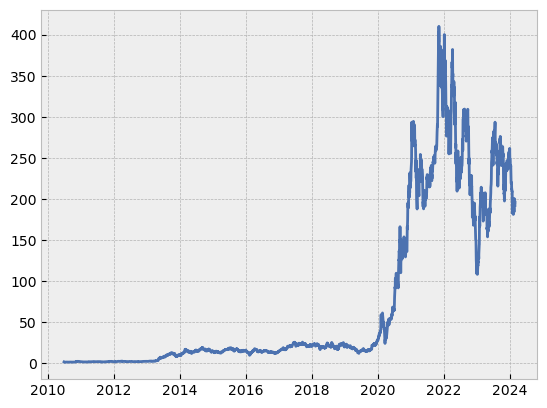

In [124]:
plt.plot(datos_tesla.Date,datos_tesla.Close) 

### Pregunta 6 - Cuadro de mando de acciones e ingresos de GameStop

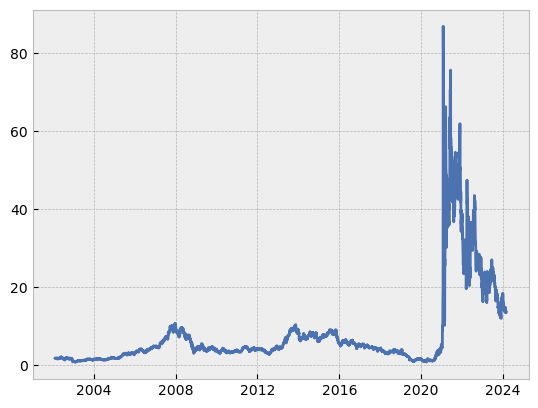

In [125]:
plt.plot(datos_game_shop.Date,datos_game_shop.Close) # no necesariamente en Jupyter Notebooks